<a href="https://colab.research.google.com/github/jlgrons/CELEHS-DSinA/blob/main/Intro_to_CNN_II_Soln.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import keras
keras.__version__

'2.8.0'

# 5.1 - Introduction to Convolutional Neural Networks (CNN)

This notebook contains part of a python tutorial found in chapter 5, section 1 of [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python?a_aid=keras&a_bid=76564dff). In the book you will find the commented code with more detailed explanations of this and other examples, databases and CNN architectures.


----
##Background
We will first go over a simple CNN example. Again we will focus on classifying images of hand written digits from the MNIST dataset.

The 6 lines of code in the cell below will show you what a basic CNN looks like. It is a stack of 2-dimensional convolutional `Conv2D` and pooling `MaxPooling2D` layers. We will see what each does in practice in the cells below. As we have seen in the course slides, CNNs will have tensors of dimension `(image_height, image_width, image_channels)` as inputs. In our case, we will configure the network to take tensors of dimension `(28, 28, 1)` (note the MNIST image format). 

We will do this in a similar manner as what we did for the simple neural networks, adding `input_shape=(28, 28, 1)` to the first layer.

---
First we will import the necessary modules from keras and load the MNIST dataset.

In [ ]:
! pip install medmnist
! pip install keras

from keras import layers
from keras import models
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
import torchvision.transforms as transforms
import numpy as np

import medmnist
from medmnist import INFO, Evaluator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 87 kB 7.1 MB/s 
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115942 sha256=ababe9912374ae638f14d458846013fa5e5efdd5f90bf7ba1516a44b92be4719
  Stored in directory: /root/.cache/pip/wheels/8a/67/fb/2e8a12fa16661b9d5af1f654bd199366799740a85c64981226
Successfully built fire
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def get_loader(dataset, batch_size):
    total_size = len(dataset)
    print('Size', total_size)
    index_generator = shuffle_iterator(range(total_size))
    while True:
        data = []
        for _ in range(batch_size):
            idx = next(index_generator)
            data.append(dataset[idx])
        yield dataset._collate_fn(data)


def shuffle_iterator(iterator):
    # iterator should have limited size
    index = list(iterator)
    total_size = len(index)
    i = 0
    random.shuffle(index)
    while True:
        yield index[i]
        i += 1
        if i >= total_size:
            i = 0
            random.shuffle(index)

def rgb2gray(rgb):
    R, G, B = rgb[0], rgb[1], rgb[2]
    imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B
    return imgGray

data_flag = 'pathmnist'
download = True

NUM_EPOCHS = 3
BATCH_SIZE = 64

info = INFO[data_flag]
task = info['task']
n_channels = info['n_channels']
n_classes = len(info['label'])

DataClass = getattr(medmnist, info['python_class'])

# preprocessing
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5])
])

# load the data
train_dataset = DataClass(split='train', transform=data_transform, download=download)
test_dataset = DataClass(split='test', transform=data_transform, download=download)

pil_dataset = DataClass(split='train', download=download)

# encapsulate data into dataloader form
train_loader = get_loader(dataset=train_dataset, batch_size=BATCH_SIZE)
test_loader = get_loader(dataset=test_dataset, batch_size=BATCH_SIZE)

print(train_dataset)

training_images = np.array([np.array(rgb2gray(elem[0])) for elem in train_dataset])
training_labels = np.array([np.array(elem[1]) for elem in train_dataset])
testing_images = np.array([np.array(rgb2gray(elem[0])) for elem in test_dataset])
testing_labels = np.array([np.array(elem[1]) for elem in test_dataset])

  0%|          | 0/205615438 [00:00<?, ?it/s]

Using downloaded and verified file: /root/.medmnist/pathmnist.npz
Using downloaded and verified file: /root/.medmnist/pathmnist.npz
Dataset PathMNIST (pathmnist)
    Number of datapoints: 89996
    Root location: /root/.medmnist
    Split: train
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'adipose', '1': 'background', '2': 'debris', '3': 'lymphocytes', '4': 'mucus', '5': 'smooth muscle', '6': 'normal colon mucosa', '7': 'cancer-associated stroma', '8': 'colorectal adenocarcinoma epithelium'}
    Number of samples: {'train': 89996, 'val': 10004, 'test': 7180}
    Description: The PathMNIST is based on a prior study for predicting survival from colorectal cancer histology slides, providing a dataset (NCT-CRC-HE-100K) of 100,000 non-overlapping image patches from hematoxylin & eosin stained histological images, and a test dataset (CRC-VAL-HE-7K) of 7,180 image patches from a different clinical center. The dataset is comprised of 9 types of tissues, resulti

---
##Building your CNN

###Construction
Next, build a CNN that takes as input MNIST images, and has:

1. 2D convolutional layer with 32 units, size 3x3, and [`relu`](https://keras.io/api/layers/activations/) activation function (HINT: function [`Conv2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D); note input shape above)

2. 2D max pooling layer with units size 2x2 (HINT: function [`MaxPooling2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D))

3. 2D convolutional layer with 64 units, size 3x3, and `relu` activation function

4. 2D max pooling layer with units size 2x2

5. 2D convolutional layer with 64 units, size 3x3, and `relu` activation function


In [ ]:
########## STUDENT WORK ##########
# Build the model
 
CNN = models.Sequential()
# Fill in the parentheses below with the relevant code
CNN.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
CNN.add(MaxPooling2D((2, 2)))
CNN.add(Conv2D(64, (3, 3), activation='relu'))
CNN.add(MaxPooling2D((2, 2)))
CNN.add(Conv2D(64, (3, 3), activation='relu'))
CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-traina

In [ ]:
###### DO NOT RUN THIS CELL ############
# expected result

#Model: "sequential"
#_________________________________________________________________
#Layer (type)                 Output Shape              Param #   
#=================================================================
#conv2d (Conv2D)              (None, 26, 26, 32)        320       
#_________________________________________________________________
#max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
#_________________________________________________________________
#conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
#_________________________________________________________________
#max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
#_________________________________________________________________
#conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
#=================================================================
#Total params: 55,744
#Trainable params: 55,744
#Non-trainable params: 0
#_________________________________________________________________

In the table above, you can see that the result of each convolutional layer (`Conv2D`) and each max pooling layer (`MaxPooling2D`) is a 3D tensor (a three dimensional matrix) of dimensions: `(hight, width, channels)`. The height and width dimensions tend to decrease as we get deeper in the neural network. The number of channels is determined by the first argument in the convolutional layer function `Conv2D` (i.e. 32 or 64).

---
The next step will be to feed the last generated tensor (of size `(3, 3, 64)`) into the fully connected classifying neural network: a stack of dense layers (`Dense`). However, the vectors used for classifying are one-dimensional, as opposed to our 3D tensor; we thus need to "flatten" ([`Flatten`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten)) the 3D tensors (i.e. transform them into vectors) and then add a few dense layers on top.

We will be doing a 10 category classification task (digits from 0 to 9). What size should the last layer be? What activation function should it have? (Hint: think back to the python notebook on simple neural networks)

Extend your CNN by adding:

1. A layer to flatten the 3D tensor into a vector 

2. A dense layer with 64 units (neurons) and `relu` activation function 

3. A dense layer with what number of units? Which activation function do we need for this one?


In [ ]:
########## STUDENT WORK ##########

CNN.add(Flatten())
# Fill in the parentheses below with the appropriate code
CNN.add(Dense(64, activation='relu'))
CNN.add(Dense(9, activation='softmax'))

In [ ]:
CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [ ]:
##### DO NOT RUN THIS CELL ####
# expected output

#Model: "sequential"
#_________________________________________________________________
#Layer (type)                 Output Shape              Param #   
#=================================================================
#conv2d (Conv2D)              (None, 26, 26, 32)        320       
#_________________________________________________________________
#max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
#_________________________________________________________________
#conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
#_________________________________________________________________
#max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
#_________________________________________________________________
#conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
#_________________________________________________________________
#flatten (Flatten)            (None, 576)               0         
#_________________________________________________________________
#dense (Dense)                (None, 64)                36928     
#_________________________________________________________________
#dense_1 (Dense)              (None, 10)                650       
#=================================================================
#Total params: 93,322
#Trainable params: 93,322
#Non-trainable params: 0
#_________________________________________________________________

As you can see, our output tensor of dimension `(3, 3, 64)` was flattened into a vector of size (3x3x6,)= `(576,)` before being processed by the two dense layers. Now that we've finished with our architecture, we will train the CNN on the MNIST data.


---
###Testing the Data Labels
We use 60,000 samples for training the neural network and 10,00 to see how well it performs. The images we will be classifying look like the image below, you can change the parameter `i` to see different examples of images their corresponding labels:

label: [5]


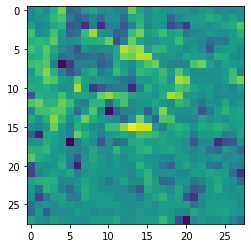

In [ ]:
########## STUDENT WORK ##########
#play around with this!

from matplotlib import pyplot as plt

i=300

print('label: ' + str(training_labels[i]))
plt.imshow(training_images[i])
plt.show()

---
###Processing the Data
Before beginning the training, you will process the images. The matrices must be converted into vectors as this is what the network takes as inputs. Additionally, the tones of gray must be normalized so that they are in the interval [0,1]. Currently, there are 60,000 28x28 matrices with values between [0,255], and you need to convert each one to a vector of 28*28 = 784 entries.

In [ ]:
# Normalizing the images
training_images = training_images.reshape(training_images.shape[0], 28, 28, 1).astype('float32')
testing_images = testing_images.reshape(testing_images.shape[0], 28, 28, 1).astype('float32')

training_images = training_images / 255
testing_images = testing_images / 255

In [ ]:
########## STUDENT WORK ##########
# One-hot encoding the training and test labels
# hint: recall the python notebook on simple neural networks

training_labels = to_categorical(training_labels)
testing_labels = to_categorical(testing_labels)

We'll use the `RMSprop` optimizer for the data:

In [ ]:
########## STUDENT WORK ##########
# compile the model
# hint: the optimizer is in the text above
# hint: the loss is commonly used for multi-class

CNN.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',  
              metrics=['accuracy'])

###Training the Model

In [ ]:
# train the model
history = CNN.fit(training_images, training_labels, epochs=5, batch_size=64)
history

Epoch 1/5
1407/1407 [==============================] - 20s 5ms/step - loss: 1.8010 - accuracy: 0.3063
Epoch 2/5
1407/1407 [==============================] - 6s 4ms/step - loss: 1.5750 - accuracy: 0.3922
Epoch 3/5
1407/1407 [==============================] - 6s 4ms/step - loss: 1.4619 - accuracy: 0.4338
Epoch 4/5
1407/1407 [==============================] - 7s 5ms/step - loss: 1.3736 - accuracy: 0.4701
Epoch 5/5
1407/1407 [==============================] - 6s 4ms/step - loss: 1.2957 - accuracy: 0.5069


---
##Visualizing the Training Results

To visualize the training results, we will consider both the loss and accuracy during training as shown below.

In [ ]:
# the training results in the formation of a dictionary
history.history.keys() #view the history dictionary keys

dict_keys(['loss', 'accuracy'])

---
First, we will plot the loss vs. epoch graph. 

Fill in the correct history dictionary key below:

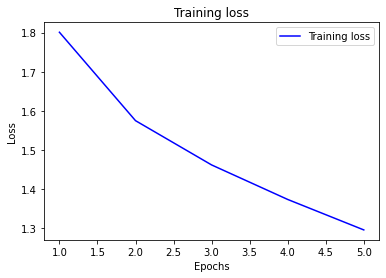

In [ ]:
import matplotlib.pyplot as plt

# history is a variable that stores the results of the trained model
# .history is an dictionary attribute of the results of the trained model 
# the history dictionary contains the losses and accuracy levels per epoch


########## STUDENT WORK ##########
# put in one of the history dictionary keys in the brackets
loss = history.history['loss']


epochs = range(1,len(loss)+1)

# Time to plot the graph
plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.title("Training loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.legend()

plt.show()

What do we notice about the loss as epoch increases? Is this what we expect?

```
STUDENT'S RESPONSE
```

---
Next, we will plot the accuracy vs. epoch graph.

Fill in the correct history dictionary key below:

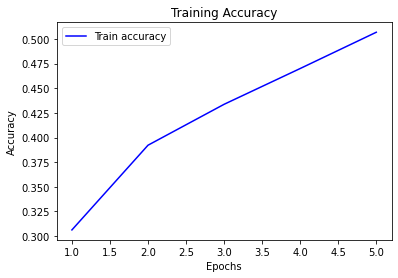

In [ ]:
########## STUDENT WORK ##########
# put in one of the history dictionary keys in the brackets
accuracy = history.history['accuracy']

plt.plot(epochs, accuracy, 'b', label ="Train accuracy")
plt.title("Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

What do we notice about the loss as epoch increases? Is this what we expect?

```
STUDENT'S RESPONSE
```

---
##Discussion of Loss and Accuracy
Finally, we will compare testing and training accuracy.

In [ ]:
train_loss, train_acc = CNN.evaluate(training_images, training_labels)

2813/2813 [==============================] - 8s 3ms/step - loss: 1.2531 - accuracy: 0.5236


In [ ]:
print("Training accuracy: {0:.1%}".format(train_acc))

Training accuracy: 52.4%


In [ ]:
# This looks at test accuracy
testing_loss, testing_acc = CNN.evaluate(testing_images, testing_labels)

225/225 [==============================] - 1s 3ms/step - loss: 1.3758 - accuracy: 0.5311


In [ ]:
print("Testing accuracy: {0:.1%}".format(testing_acc))

Testing accuracy: 53.1%


Compare the training and testing accuracy. Is this what we expect? Why?

```
STUDENT'S RESPONSE
```